# Year Prediction for Songs

Second part of the project is bringing ANN in. We have utilized the code of the textbook we have been reading, which can be found [here](http://neuralnetworksanddeeplearning.com/chap3.html). We have modified loader script so that it loads the Million Song Dataset instead.

We will try several things:

- Artificial Neural Network with no Hidden Layer (Naive Try)
- Deep Neural Network
- A more complex Convolutional Neural Network Structure


# (1) Artificial Neural Network with no Hidden Layer


As explained above, we have modified the loader script. The code will start by calling the piece that loads the data.

In [18]:
import loader
import network2

training_data, test_data = loader.load_data_wrapper()

In [ ]:
net = network2.Network([90,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy =\
    net.SGD(training_data, 30, 10, 0.5,
        evaluation_data=test_data, lmbda = 0.1,
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
        monitor_training_cost=True, monitor_training_accuracy=True)

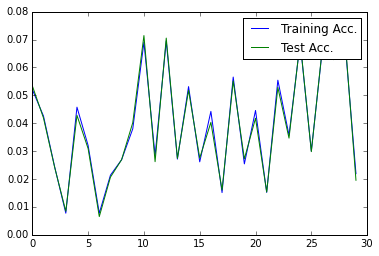

In [14]:
#30 epoch of Shallow NN

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

training_accuracy = np.array([24146, 19740, 11306, 3595, 21213, 14844, 3593, 9908, 12481, 17614, 32015, 13160, 32208, 12579, 24630, 12128, 20511, 7014, 26218, 11787, 20669, 7055, 25695, 16553, 31979, 13903, 31048, 29503, 32423, 10164]).astype(float)
evaluation_accuracy = np.array([2757, 2162, 1249, 436, 2210, 1595, 337, 1067, 1390, 2075, 3687, 1353, 3640, 1415, 2674, 1420, 2081, 828, 2847, 1405, 2157, 792, 2728, 1789, 3584, 1539, 3479, 3241, 3688, 1009]).astype(float)

training_accuracy   /= 463715
evaluation_accuracy /= 51630

plt.plot(xrange(0,30),training_accuracy,label="Training Acc.")
plt.plot(xrange(0,30),evaluation_accuracy,label="Test Acc.")
plt.legend()

As it can be seen, the results are very bad, our accuracy goes between 2%-5%, with maximum 6.99%. And the cost was always "infinite", whether the cost function was a sq. or cross entropy.

# (2) Deep Neural Network

The only difference here is to go from [90,90] to [90,60,90].

In [ ]:
net = network2.Network([90,30,90], cost=network2.CrossEntropyCost) 
net.large_weight_initializer()

evaluation_cost, evaluation_accuracy, training_cost, training_accuracy =\
    net.SGD(training_data, 30, 10, 0.5,
        evaluation_data=test_data, lmbda = 0.1,
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True,
        monitor_training_cost=True, monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 5.72831129832
Accuracy on training data: 31452 / 463715
Cost on evaluation data: 5.75498670957
Accuracy on evaluation data: 3498 / 51630



# (3) Convolutional Neural Networks

In order to run this part, we need to install dependencies such as Theano.

In [ ]:
# import network3
# from network3 import Network
# from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
# training_data, validation_data, test_data = network3.load_data_shared()
# mini_batch_size = 10
# net = Network([
#         FullyConnectedLayer(n_in=90, n_out=100),
#         SoftmaxLayer(n_in=100, n_out=90)], mini_batch_size)
# net.SGD(training_data, 60, mini_batch_size, 0.1, 
#         validation_data, test_data)

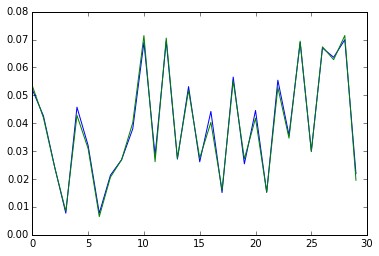